In [1]:
#Сопоставление фотографий Прокудина-Горского
%matplotlib inline
from skimage.io import imread,imshow,imsave 
from skimage import img_as_float, img_as_ubyte 
from numpy import dstack

In [44]:
#загружаем скан фотографии из файла
img_0 = imread('C:\\Users\\Elena\\Documents\\stepik\\images_course\\03.png')

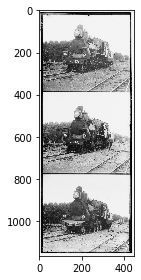

In [45]:
imshow(img_0)

In [46]:
#преобразуем значения изображения в вещественные
img_0_f = img_as_float(img_0)

In [47]:
img_0_f.dtype

dtype('float64')

In [69]:
#выделям три канала
img0_size = img_0_f.shape[0]//3
img0_b = img_0_f[:img0_size, :]
img0_g = img_0_f[img0_size:img0_size*2, :]
img0_r = img_0_f[img0_size*2:img_0_f.shape[0]-2, :]

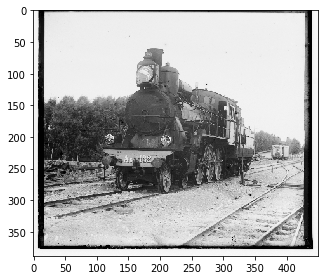

In [70]:
imshow(img0_r)

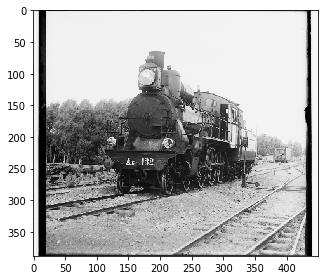

In [71]:
imshow(img0_g)

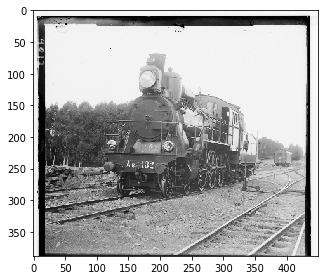

In [72]:
imshow(img0_b)

In [73]:
#обрезаем с крайев по 5%
a = img0_r.shape[0]
b = img0_r.shape[1]
img0_r = img0_r[round(a*0.1):a-round(a*0.1), round(b*0.1) : b - round(b*0.1)]

a1 = img0_g.shape[0]
b1 = img0_g.shape[1]
img0_g = img0_g[round(a1*0.1):a1-round(a1*0.1), round(b1*0.1) : b1 - round(b1*0.1)]

a2 = img0_b.shape[0]
b2 = img0_b.shape[1]
img0_b = img0_b[round(a2*0.1):a2-round(a2*0.1), round(b2*0.1) : b2 - round(b2*0.1)]


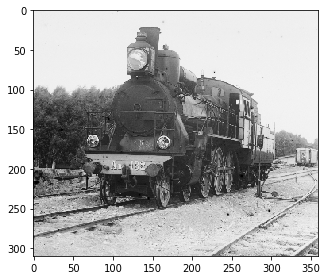

In [74]:
imshow(img0_r)

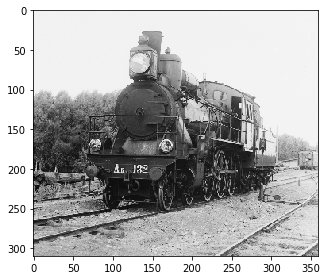

In [75]:
imshow(img0_g)

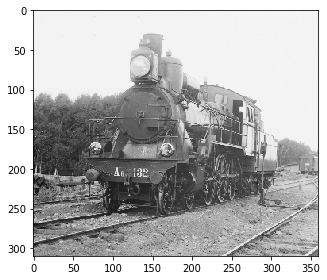

In [76]:
imshow(img0_b)

In [77]:
#сдвигаем синий канал, накладываем на зеленый, считаем похожесть
#величина корреляции прямо пропорциональна похожести
import numpy as np
max_corr,bcor_i, bcor_j = 0 , 0, 0
for i in range (-15,16):
    for j in range (-15,16):
        b_g = np.roll(img0_b, i, axis=0)
        b_v = np.roll(b_g, j, axis=1)
        correlation = (b_v*img0_g).sum()
        if correlation > max_corr:
            bcor_i, bcor_j = i, j
            max_corr = correlation
print(bcor_i, bcor_j)

-4 -1


In [78]:
#сдвигаем красный канал, накладываем на зеленый, считаем похожесть
max_corr, rcor_i, rcor_j = 0 , 0, 0
correlation = 0
for i in range (-15,16):
    for j in range (-15,16):
        r_g = np.roll(img0_r, i, axis=0)
        r_v = np.roll(r_g, j, axis=1)
        correlation = (r_v*img0_g).sum()
        if correlation > max_corr:
            rcor_i, rcor_j = i, j
            max_corr = correlation
print(rcor_i, rcor_j)

5 3


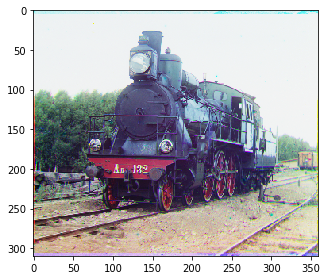

In [79]:
#совмещаем три канала с наилучшими сдвигами
r_rez_1 = np.roll(img0_r, rcor_i, axis=0)
r_rez = np.roll(r_rez_1, rcor_j, axis=1)

b_rez_1 = np.roll(img0_b, bcor_i, axis=0)
b_rez = np.roll(b_rez_1, bcor_j, axis=1)

img0_rez = dstack((r_rez, img0_g, b_rez))
imshow(img0_rez)